# **Lab12: Data Augmentation in Training CNNs for Image Classification**

In [1]:
# Import statements
import tensorflow as tf                                                                                                                                
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np                             
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import metrics

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## **Experiment 1: Without Data Augmentation**

### **Data Generator**

In [0]:
# Data Generator
datagen = ImageDataGenerator(rescale=1./255)

# Train DataGenerator
train_generator = datagen.flow_from_directory('cats_and_dogs_small/train/', class_mode='binary', batch_size=64)
# Validation DataGenerator
val_generator = datagen.flow_from_directory('cats_and_dogs_small/validation/', class_mode='binary', batch_size=64)
# Test DataGenerator
test_generator = datagen.flow_from_directory('cats_and_dogs_small/test/', class_mode='binary', batch_size=64)

X_train, Y_train = train_generator.next()

X_train.shape, Y_train.shape

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


((64, 256, 256, 3), (64,))

In [0]:
# Maintaining Tag to Id and Id to Tag Dict
tag_to_id = {
    "cats": 0,
    "dogs": 1,
}

id_to_tag = {v:k for k,v in tag_to_id.items()}
id_to_tag

{0: 'cats', 1: 'dogs'}

### **Data Visualization**

In [0]:
def visualize(images, labels):
  rows = 2
  columns = 5
  fig=plt.figure(figsize=(10, 6))
  for index in range(10):
    fig.add_subplot(rows, columns, index + 1, xticks=[], yticks=[])
    plt.title(id_to_tag[labels[index]])
    plt.imshow(images[index], cmap="gray")

  plt.show()

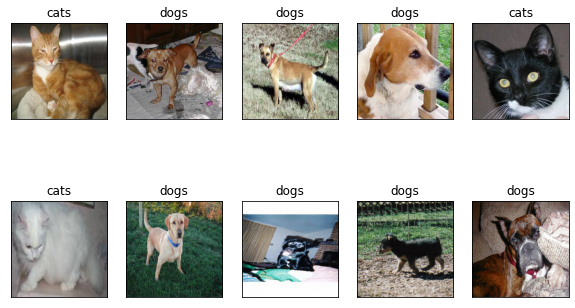

In [0]:
# Visualize Training Data
visualize(X_train, Y_train)

### **Define VGG-19 Model**

In [0]:
# Define Model Layers
input_im = keras.layers.Input(shape=(256, 256, 3,), name="input_image")

conv1 = keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu', name="conv_1")(input_im)
conv2 = keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu', name="conv_2")(conv1)
pool1 = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="pool_1")(conv2)

conv3 = keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu', name="conv_3")(pool1)
conv4 = keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu', name="conv_4")(conv3)
pool2 = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="pool_2")(conv4)

conv5 = keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu', name="conv_5")(pool2)
conv6 = keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu', name="conv_6")(conv5)
conv7 = keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu', name="conv_7")(conv6)
conv8 = keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu', name="conv_8")(conv7)
pool3 = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="pool_3")(conv8)

conv9 = keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu', name="conv_9")(pool3)
conv10 = keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu', name="conv_10")(conv9)
conv11 = keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu', name="conv_11")(conv10)
conv12 = keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu', name="conv_12")(conv11)
pool4 = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="pool_4")(conv12)

conv13 = keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu', name="conv_13")(pool4)
conv14 = keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu', name="conv_14")(conv13)
conv15 = keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu', name="conv_15")(conv14)
conv16 = keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu', name="conv_16")(conv15)
pool5 = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="pool_5")(conv16)

flat = keras.layers.Flatten(name="flat")(pool5)
dense_1 = keras.layers.Dense(4096, activation="relu", name="dense_1")(flat)
dense_2 = keras.layers.Dense(4096, activation="relu", name="dense_2")(dense_1)
output = keras.layers.Dense(1, activation="sigmoid", name="output")(dense_2)

# Define Model Inputs and Output
model = keras.models.Model(input_im,output)
# Compile Model
model.compile(optimizer='sgd', loss="binary_crossentropy", metrics=["accuracy"])
# Model Summary
model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_image (InputLayer)     [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
conv_2 (Conv2D)              (None, 256, 256, 64)      36928     
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 128, 128, 64)      0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 128, 128, 128)     73856     
_________________________________________________________________
conv_4 (Conv2D)              (None, 128, 128, 128)     147584    
_________________________________________________________________
pool_2 (MaxPooling2D)        (None, 64, 64, 128)       0   

### **Training**

In [0]:
batch_size = 64
train_len = 2000
val_len = 1000
epochs = 12
history = model.fit(train_generator, steps_per_epoch= train_len / batch_size, 
                    validation_data=val_generator, validation_steps=val_len / batch_size , epochs=epochs)

Epoch 1/12
32/31 [==============================] - 89s 3s/step - loss: 0.6929 - accuracy: 0.5285 - val_loss: 0.6927 - val_accuracy: 0.5380
Epoch 2/12
32/31 [==============================] - 90s 3s/step - loss: 0.6930 - accuracy: 0.5310 - val_loss: 0.6928 - val_accuracy: 0.5060
Epoch 3/12
32/31 [==============================] - 90s 3s/step - loss: 0.6929 - accuracy: 0.5150 - val_loss: 0.6929 - val_accuracy: 0.4980
Epoch 4/12
32/31 [==============================] - 90s 3s/step - loss: 0.6929 - accuracy: 0.5125 - val_loss: 0.6927 - val_accuracy: 0.5530
Epoch 5/12
32/31 [==============================] - 90s 3s/step - loss: 0.6927 - accuracy: 0.5265 - val_loss: 0.6927 - val_accuracy: 0.5100
Epoch 6/12
32/31 [==============================] - 90s 3s/step - loss: 0.6927 - accuracy: 0.5345 - val_loss: 0.6927 - val_accuracy: 0.5600
Epoch 7/12
32/31 [==============================] - 90s 3s/step - loss: 0.6927 - accuracy: 0.5445 - val_loss: 0.6927 - val_accuracy: 0.4940
Epoch 8/12
32/31 [==

### **Training and Testing Accuracy**

In [0]:
_, train_acc = model.evaluate(train_generator, steps=train_len / batch_size)
_, val_acc = model.evaluate(val_generator, steps=val_len / batch_size)
_, test_acc = model.evaluate(test_generator, steps= 1000 / batch_size)

print('Training Accuray: ', train_acc * 100)
print('Validation Accuracy: ', val_acc * 100)
print('Testing Accuray: ', test_acc * 100)

16/15 [==============================] - 12s 751ms/step - loss: 0.6924 - accuracy: 0.5310
Training Accuray:  52.24999785423279
Validation Accuracy:  52.799999713897705
Testing Accuray:  53.1000018119812


### **Evaluation Metrics Report**

In [0]:
# Evaluate
actual = []
predicted = []

for i in range(len(test_generator)):
  X_test, Y_test = test_generator[i]
  pred_cat = model.predict(X_test)
  predicted.append([int(np.round(i)) for i in pred_cat])
  actual.append([int(np.round(i)) for i in Y_test])

actual_tag = [id_to_tag[i] for batch in actual for i in batch]
actual_tag = np.array(actual_tag)
predicted_tag = [id_to_tag[i] for batch in predicted for i in batch]
predicted_tag = np.array(predicted_tag)

# Metrics Report
report = metrics.classification_report(y_pred=predicted_tag, y_true=actual_tag)
print(report)

              precision    recall  f1-score   support

        cats       0.52      0.97      0.67       500
        dogs       0.73      0.09      0.17       500

    accuracy                           0.53      1000
   macro avg       0.63      0.53      0.42      1000
weighted avg       0.63      0.53      0.42      1000



### **Accuracy Curve**

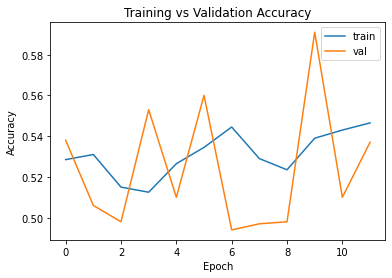

In [0]:
# Plotting Training Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])  
plt.title('Training vs Validation Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train', 'val']) 
plt.show()

### **Loss Curve**

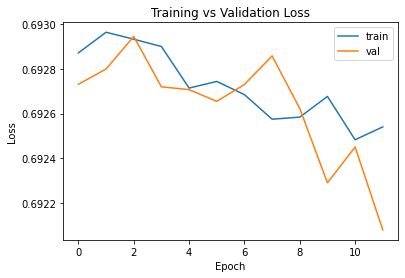

In [0]:
# Plotting Training Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Training vs Validation Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['train', 'val']) 
plt.show()

### **Confusion Matrix**

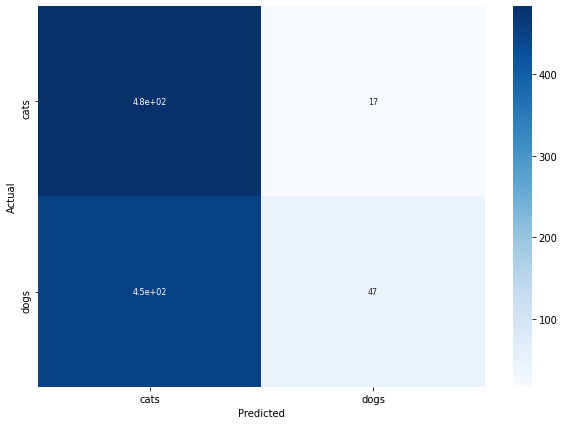

In [0]:
# Confusion Matrix
cm = metrics.confusion_matrix(actual_tag, predicted_tag)

df_cm = pd.DataFrame(cm, columns=np.unique(actual_tag), index = np.unique(predicted_tag))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 8})

### **Testing**

In [0]:
def inference(images):
  rows = 2
  columns = 5
  fig=plt.figure(figsize=(10, 6))
  for index in range(10):
    fig.add_subplot(rows, columns, index+1, xticks=[], yticks=[])
    image = images[index].reshape(1, 256, 256, 3)
    label = model.predict(image)
    image = image.reshape(256,256,3)
    plt.title(id_to_tag[int(np.round(label))])
    plt.imshow(image, cmap="gray")
  plt.show()

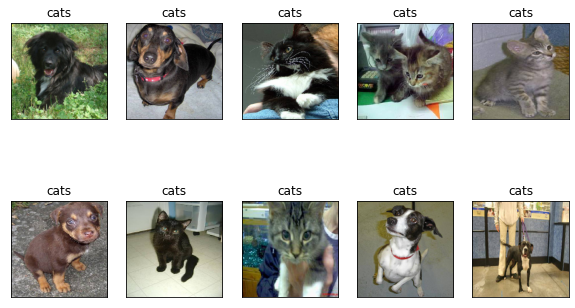

In [0]:
inference(test_generator[0][0])

## **Experiment 2: With Data Augmentation**

### **Data Generator and Augmentation**

In [3]:
# Data Generator with Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest")

test_datagen = ImageDataGenerator(rescale=1./255)

# Train DataGenerator
train_generator = train_datagen.flow_from_directory('cats_and_dogs_small/train/', class_mode='binary', batch_size=64)
# Validation DataGenerator
val_generator = test_datagen.flow_from_directory('cats_and_dogs_small/validation/', class_mode='binary', batch_size=64)
# Test DataGenerator
test_generator = test_datagen.flow_from_directory('cats_and_dogs_small/test/', class_mode='binary', batch_size=64)

X_train, Y_train = train_generator.next()

X_train.shape, Y_train.shape

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


((64, 256, 256, 3), (64,))

In [4]:
# Maintaining Tag to Id and Id to Tag Dict
tag_to_id = {
    "cats": 0,
    "dogs": 1,
}

id_to_tag = {v:k for k,v in tag_to_id.items()}
id_to_tag

{0: 'cats', 1: 'dogs'}

### **Data Visualization**

In [0]:
def visualize(images, labels):
  rows = 2
  columns = 5
  fig=plt.figure(figsize=(10, 6))
  for index in range(10):
    fig.add_subplot(rows, columns, index + 1, xticks=[], yticks=[])
    plt.title(id_to_tag[labels[index]])
    plt.imshow(images[index], cmap="gray")

  plt.show()

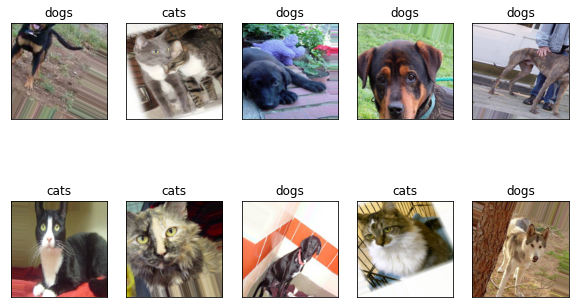

In [6]:
# Visualize Training Data
visualize(X_train, Y_train)

### **Define VGG-19 Model**

In [7]:
# Define Model Layers
input_im = keras.layers.Input(shape=(256, 256, 3,), name="input_image")

conv1 = keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu', name="conv_1")(input_im)
conv2 = keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu', name="conv_2")(conv1)
pool1 = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="pool_1")(conv2)

conv3 = keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu', name="conv_3")(pool1)
conv4 = keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu', name="conv_4")(conv3)
pool2 = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="pool_2")(conv4)

conv5 = keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu', name="conv_5")(pool2)
conv6 = keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu', name="conv_6")(conv5)
conv7 = keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu', name="conv_7")(conv6)
conv8 = keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu', name="conv_8")(conv7)
pool3 = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="pool_3")(conv8)

conv9 = keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu', name="conv_9")(pool3)
conv10 = keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu', name="conv_10")(conv9)
conv11 = keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu', name="conv_11")(conv10)
conv12 = keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu', name="conv_12")(conv11)
pool4 = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="pool_4")(conv12)

conv13 = keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu', name="conv_13")(pool4)
conv14 = keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu', name="conv_14")(conv13)
conv15 = keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu', name="conv_15")(conv14)
conv16 = keras.layers.Conv2D(512, (3, 3), padding='same', activation='relu', name="conv_16")(conv15)
pool5 = keras.layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2), name="pool_5")(conv16)

flat = keras.layers.Flatten(name="flat")(pool5)
dense_1 = keras.layers.Dense(4096, activation="relu", name="dense_1")(flat)
dense_2 = keras.layers.Dense(4096, activation="relu", name="dense_2")(dense_1)
output = keras.layers.Dense(1, activation="sigmoid", name="output")(dense_2)

# Define Model Inputs and Output
model = keras.models.Model(input_im,output)
# Compile Model
model.compile(optimizer='sgd', loss="binary_crossentropy", metrics=["accuracy"])
# Model Summary
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_image (InputLayer)     [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv_1 (Conv2D)              (None, 256, 256, 64)      1792      
_________________________________________________________________
conv_2 (Conv2D)              (None, 256, 256, 64)      36928     
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 128, 128, 64)      0         
_________________________________________________________________
conv_3 (Conv2D)              (None, 128, 128, 128)     73856     
_________________________________________________________________
conv_4 (Conv2D)              (None, 128, 128, 128)     147584    
_________________________________________________________________
pool_2 (MaxPooling2D)        (None, 64, 64, 128)       0     

### **Training**

In [9]:
batch_size = 64
train_len = 2000
val_len = 1000
epochs = 50
history = model.fit(train_generator, steps_per_epoch= train_len / batch_size, 
                    validation_data=val_generator, validation_steps=val_len / batch_size , epochs=epochs)

Epoch 1/50
32/31 [==============================] - 95s 3s/step - loss: 0.6931 - accuracy: 0.5085 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 2/50
32/31 [==============================] - 95s 3s/step - loss: 0.6931 - accuracy: 0.5045 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 3/50
32/31 [==============================] - 95s 3s/step - loss: 0.6931 - accuracy: 0.5090 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 4/50
32/31 [==============================] - 95s 3s/step - loss: 0.6931 - accuracy: 0.5025 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 5/50
32/31 [==============================] - 95s 3s/step - loss: 0.6931 - accuracy: 0.5170 - val_loss: 0.6930 - val_accuracy: 0.5300
Epoch 6/50
32/31 [==============================] - 95s 3s/step - loss: 0.6930 - accuracy: 0.5115 - val_loss: 0.6930 - val_accuracy: 0.5820
Epoch 7/50
32/31 [==============================] - 95s 3s/step - loss: 0.6930 - accuracy: 0.5090 - val_loss: 0.6929 - val_accuracy: 0.5470
Epoch 8/50
32/31 [==

In [10]:
_, train_acc = model.evaluate(train_generator, steps=train_len / batch_size)
_, val_acc = model.evaluate(val_generator, steps=val_len / batch_size)
_, test_acc = model.evaluate(test_generator, steps= 1000 / batch_size)

print('Training Accuray: ', train_acc * 100)
print('Validation Accuracy: ', val_acc * 100)
print('Testing Accuray: ', test_acc * 100)

16/15 [==============================] - 13s 790ms/step - loss: 0.6898 - accuracy: 0.5720
Training Accuray:  58.49999785423279
Validation Accuracy:  61.59999966621399
Testing Accuray:  57.200002670288086


### **Training and Testing Accuracy**

### **Evaluation Metrics Report**

In [11]:
# Evaluate
actual = []
predicted = []

for i in range(len(test_generator)):
  X_test, Y_test = test_generator[i]
  pred_cat = model.predict(X_test)
  predicted.append([int(np.round(i)) for i in pred_cat])
  actual.append([int(np.round(i)) for i in Y_test])

actual_tag = [id_to_tag[i] for batch in actual for i in batch]
actual_tag = np.array(actual_tag)
predicted_tag = [id_to_tag[i] for batch in predicted for i in batch]
predicted_tag = np.array(predicted_tag)

# Metrics Report
report = metrics.classification_report(y_pred=predicted_tag, y_true=actual_tag)
print(report)

              precision    recall  f1-score   support

        cats       0.56      0.63      0.60       500
        dogs       0.58      0.51      0.54       500

    accuracy                           0.57      1000
   macro avg       0.57      0.57      0.57      1000
weighted avg       0.57      0.57      0.57      1000



### **Accuracy Curve**

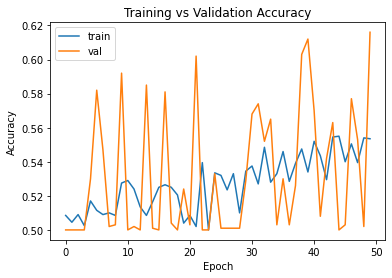

In [12]:
# Plotting Training Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])  
plt.title('Training vs Validation Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend(['train', 'val']) 
plt.show()

### **Loss Curve**

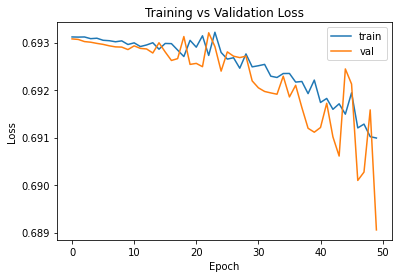

In [13]:
# Plotting Training Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss']) 
plt.title('Training vs Validation Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend(['train', 'val']) 
plt.show()

### **Confusion Matrix**

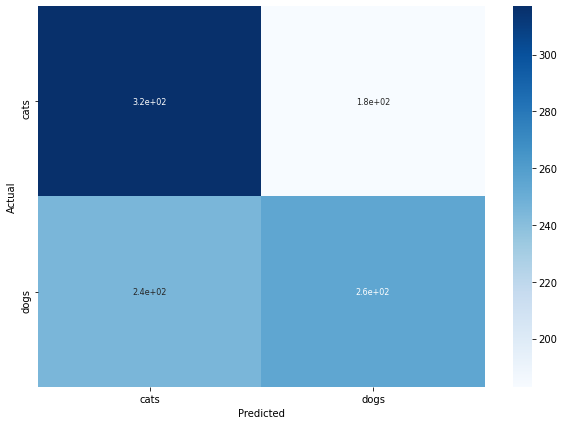

In [14]:
# Confusion Matrix
cm = metrics.confusion_matrix(actual_tag, predicted_tag)

df_cm = pd.DataFrame(cm, columns=np.unique(actual_tag), index = np.unique(predicted_tag))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'

plt.figure(figsize = (10, 7))
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 8})

### **Testing**

In [0]:
def inference(images):
  rows = 2
  columns = 5
  fig=plt.figure(figsize=(10, 6))
  for index in range(10):
    fig.add_subplot(rows, columns, index+1, xticks=[], yticks=[])
    image = images[index].reshape(1, 256, 256, 3)
    label = model.predict(image)
    image = image.reshape(256,256,3)
    plt.title(id_to_tag[int(np.round(label))])
    plt.imshow(image, cmap="gray")
  plt.show()

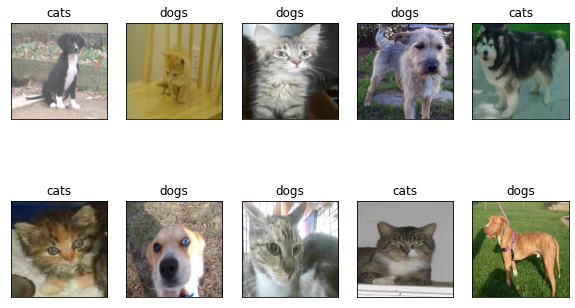

In [16]:
inference(test_generator[0][0])